# Data Exploration and Processing

## Data Exploration
This programming task aims at giving you some hands-on experiences on medical data. It is a modified version of assignment from [Coursera AI for Medicine Specialization](https://github.com/amanchadha/coursera-ai-for-medicine-specialization). Now, you will work with chest x-ray images taken from the public [ChestX-ray8 dataset](https://arxiv.org/abs/1705.02315). In this notebook, you'll get a chance to explore this dataset and familiarize yourself with some of the techniques you'll use in the first graded assignment.

<img src="xray-image.png" alt="U-net Image" width="300" align="middle"/>

The first step before jumping into writing code for any machine learning project is to explore your data. A standard Python package for analyzing and manipulating data is [pandas](https://pandas.pydata.org/docs/#). 

With the next two code cells, you'll import `pandas` and a package called `numpy` for numerical manipulation, then use `pandas` to read a csv file into a dataframe and print out the first few rows of data.

In [3]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()

In [4]:
# Read csv file containing training datadata
train_df = pd.read_csv("nih/train-small.csv")
# Print first 5 rows
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head()

There are 1000 rows and 16 columns in this data frame


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


Have a look at the various columns in this csv file. The file contains the names of chest x-ray images ("Image" column) and the columns filled with ones and zeros identify which diagnoses were given based on each x-ray image. 

### Data types and null values check
Run the next cell to explore the data types present in each column and whether any null values exist in the data.

In [5]:
# Look at the data type of each column and whether null values are present
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

### Unique IDs check
"PatientId" has an identification number for each patient. One thing you'd like to know about a medical dataset like this is if you're looking at repeated data for certain patients or whether each image represents a different person.

In [6]:
print(f"The total patient ids are {train_df['PatientId'].count()}, from those the unique ids are {train_df['PatientId'].value_counts().shape[0]} ")

The total patient ids are 1000, from those the unique ids are 928 


As you can see, the number of unique patients in the dataset is less than the total number so there must be some overlap. For patients with multiple records, you'll want to make sure they do not show up in both training and test sets in order to avoid data leakage (covered later in this week's lectures).

### Explore data labels
Run the next two code cells to create a list of the names of each patient condition or disease. 

In [7]:
columns = train_df.keys()
columns = list(columns)
print(columns)

['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [8]:
# Remove unnecessary elements
columns.remove('Image')
columns.remove('PatientId')
# Get the total classes
print(f"There are {len(columns)} columns of labels for these conditions: {columns}")

There are 14 columns of labels for these conditions: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


Run the next cell to print out the number of positive labels (1's) for each condition

In [9]:
# Print out the number of positive labels for each class
for column in columns:
    print(f"The class {column} has {train_df[column].sum()} samples")

The class Atelectasis has 106 samples
The class Cardiomegaly has 20 samples
The class Consolidation has 33 samples
The class Edema has 16 samples
The class Effusion has 128 samples
The class Emphysema has 13 samples
The class Fibrosis has 14 samples
The class Hernia has 2 samples
The class Infiltration has 175 samples
The class Mass has 45 samples
The class Nodule has 54 samples
The class Pleural_Thickening has 21 samples
The class Pneumonia has 10 samples
The class Pneumothorax has 38 samples


Have a look at the counts for the labels in each class above. Does this look like a balanced dataset?

### Data Visualization
Using the image names listed in the csv file, you can retrieve the image associated with each row of data in your dataframe. 

Run the cell below to visualize a random selection of images from the dataset.

Display Random Images


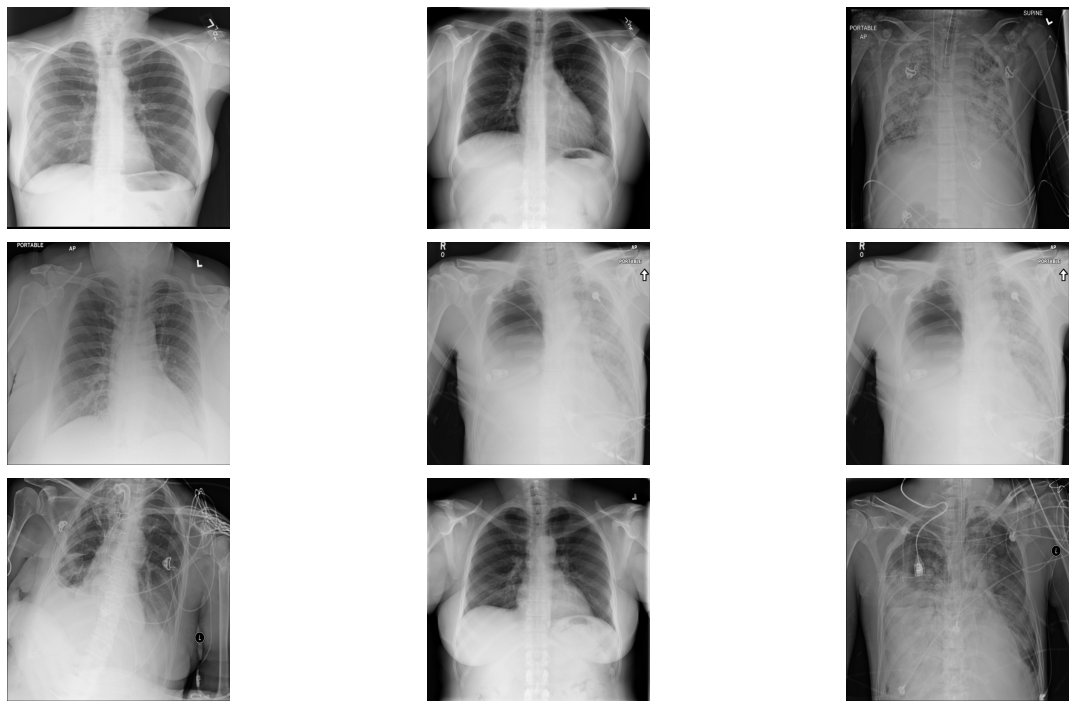

In [10]:
# Extract numpy values from Image column in data frame
images = train_df['Image'].values

# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

# Location of the image dir
img_dir = 'nih/images-small/'

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()    

### Investigate a single image
Run the cell below to look at the first image in the dataset and print out some details of the image contents.

C:\Users\RedmiBook\AppData\Local\Temp\ipykernel_46120\1218987667.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 0.9176 and the minimum is 0.0000
The mean value of the pixels is 0.5800 and the standard deviation is 0.2294


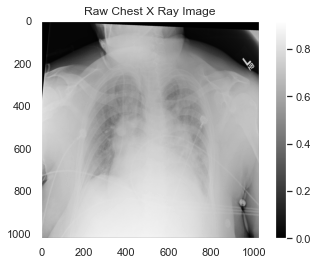

In [37]:
# Get the first image that was listed in the train_df dataframe
sample_img = train_df.Image[5]
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.grid(False)
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

### Investigate pixel value distribution
Run the cell below to plot up the distribution of pixel values in the image shown above. 

D:\anaconda\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

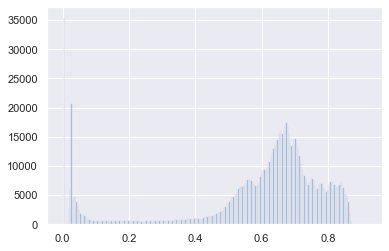

D:\anaconda\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

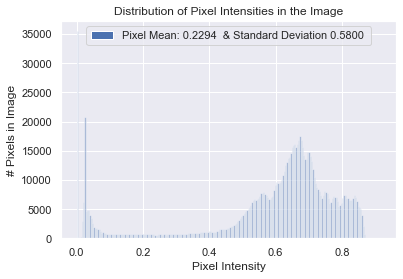

In [77]:
# Plot a histogram of the distribution of the pixels
### Your code here ###
raw_image=raw_image.reshape(1,1048576)
sns.distplot(raw_image,bins=len(np.unique(raw_image)),kde=False,color='b')
import matplotlib.patches as mp
info = mp.Patch(label='Pixel Mean: %.4f  & Standard Deviation %.4f '%(raw_image.std(),raw_image.mean()))
### End your code ###
plt.legend(handles=[info],loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

<a name="image-processing"></a>

# Image Preprocessing in PyTorch

Before training, you'll first modify your images to be better suited for training a convolutional neural network. For this task you'll use the PyTorch [Dataset](https://pytorch.org/docs/stable/data.html?highlight=dataset#torch.utils.data.Dataset) and [DataLoader](https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader) classes to load data, and use [torchvision.transforms](https://pytorch.org/vision/stable/auto_examples/plot_transforms.html?highlight=transforms) to perform data preprocessing and data augmentation.

Run the next two cells to create an image generator for preprocessing.

In [78]:
# Import necessary packages
import copy
from PIL import Image
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

D:\anaconda\envs\pytorch\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'D:\anaconda\envs\pytorch\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [86]:
# Create Dataset
class XRayDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        """
        Dataset for chest X ray
        :param data_dir: str, directory for the dataset
        :param transform: torch.transform，data processing
        """
        self.data_info = self.get_img_info(data_dir)  # data_info saves all image paths
        self.transform = transform

    def __getitem__(self, index):
        # return processed data according to index of self.data_info
        path_img = self.data_info[index]
        img = Image.open(path_img).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        return img

    def __len__(self):
        return len(self.data_info)

    @staticmethod
    def get_img_info(data_dir):
        """
        Read image file paths and store them in data_info
        :param data_dir: str, the base directory for the dataset
        :return data_info: list, containing all image paths
        """
        ### Your code here ###
        data_info=[os.path.join(data_dir, i ) for i in os.listdir(data_dir)]
        
        ### End your code ###

        return data_info

### Standardization

The `XRayDataset` you created above will act to load the image data from your data directory.

Next, we will implement the data standardization to make the images more suitable for the model. In other words, you need to reduce each pixel by the mean value, and divide it by the standard deviation:

$$\frac{x_i - \mu}{\sigma}$$

Run the next cell to pre-process your data using the `data_transform`. In this step you will also be reducing the image size down to 320x320 pixels.

In [87]:
# Create transformation for data standardization

norm_mean = [0.6, 0.6, 0.6]
norm_std = [0.225, 0.225, 0.225]
data_transform = transforms.Compose([
    transforms.Resize((320, 320)),
    transforms.ToTensor(),
    ### Your code here, use API like transforms.XXX() ###
    transforms.Normalize(norm_mean, norm_std)
    ### End your code ###
])
dataset = XRayDataset('nih/images-small', data_transform)

Run the next cell to plot up an example of a pre-processed image

The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 1.6732 and the minimum is -2.4924
The mean value of the pixels is 0.1094 and the standard deviation is 1.1569


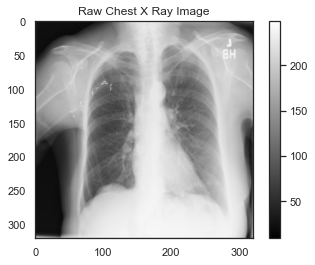

In [88]:
# Plot a pre-processed image
def transform_invert(img_, transform_train):
    """
    transform a standardized image to original image
    :param img_: tensor
    :param transform_train: torchvision.transforms
    :return: PIL image
    """
    if 'Normalize' in str(transform_train):
        norm_transform = list(filter(lambda x: isinstance(x, transforms.Normalize), transform_train.transforms))
        mean = torch.tensor(norm_transform[0].mean, dtype=img_.dtype, device=img_.device)
        std = torch.tensor(norm_transform[0].std, dtype=img_.dtype, device=img_.device)
        img_.mul_(std[:, None, None]).add_(mean[:, None, None])

    img_ = img_.transpose(0, 2).transpose(0, 1)  # C*H*W --> H*W*C
    img_ = np.array(img_) * 255

    if img_.shape[2] == 3:
        img_ = Image.fromarray(img_.astype('uint8')).convert('RGB')
    elif img_.shape[2] == 1:
        img_ = Image.fromarray(img_.astype('uint8').squeeze())
    else:
        raise Exception("Invalid img shape, expected 1 or 3 in axis 2, but got {}!".format(img_.shape[2]) )

    return img_

sns.set_style("white")
generated_image = dataset.__getitem__(0)
inverted_image = transform_invert(copy.deepcopy(generated_image), data_transform)
plt.imshow(inverted_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Run the cell below to see a comparison of the distribution of pixel values in the new pre-processed image versus the raw image. 

Text(0, 0.5, '# Pixel')

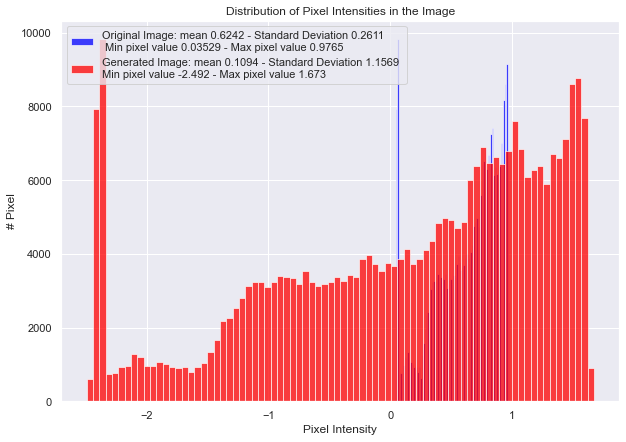

In [89]:
# Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original iamge
inverted_image = np.array(inverted_image) / 255
sns.histplot(inverted_image.ravel(), 
             label=f'Original Image: mean {np.mean(inverted_image):.4f} - Standard Deviation {np.std(inverted_image):.4f} \n '
             f'Min pixel value {np.min(inverted_image):.4} - Max pixel value {np.max(inverted_image):.4}',
             color='blue', 
             kde=False)

# Plot histogram for generated image
generated_image = np.array(generated_image)
sns.histplot(generated_image.ravel(), 
             label=f'Generated Image: mean {np.mean(generated_image):.4f} - Standard Deviation {np.std(generated_image):.4f} \n'
             f'Min pixel value {np.min(generated_image):.4} - Max pixel value {np.max(generated_image):.4}', 
             color='red', 
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')

### More data augmentation mehtods

Other than standardization, data can be somehow randomly transformed to enrich the data diversity. In this assignment, you will get familiar with some basic and widely used ones.

Text(0.5, 1.0, 'Chest X Ray Image after Random Cropping')

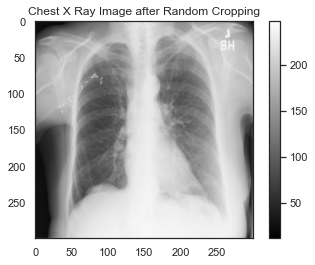

In [94]:
# Random cropping

data_transform = transforms.Compose([
    transforms.Resize((320, 320)),
    ### Your code here, use API like transforms.XXX() ###
    transforms.RandomCrop(300),
    ### End your code ###
    transforms.ToTensor()
])
dataset = XRayDataset('nih/images-small', data_transform)

sns.set_style("white")
generated_image = dataset.__getitem__(0)
inverted_image = transform_invert(copy.deepcopy(generated_image), data_transform)
plt.imshow(inverted_image, cmap='gray')
plt.colorbar()
plt.title('Chest X Ray Image after Random Cropping')

Text(0.5, 1.0, 'Chest X Ray Image after Flipping')

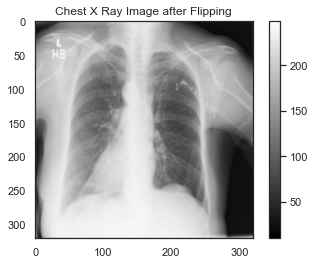

In [96]:
# Horizontal flip

data_transform = transforms.Compose([
    transforms.Resize((320, 320)),
    ### Your code here, use API like transforms.XXX() ###
    transforms.RandomHorizontalFlip(p=1),
    ### End your code ###
    transforms.ToTensor()
])
dataset = XRayDataset('nih/images-small', data_transform)

sns.set_style("white")
generated_image = dataset.__getitem__(0)
inverted_image = transform_invert(copy.deepcopy(generated_image), data_transform)
plt.imshow(inverted_image, cmap='gray')
plt.colorbar()
plt.title('Chest X Ray Image after Flipping')

Text(0.5, 1.0, 'Chest X Ray Image after Rotating')

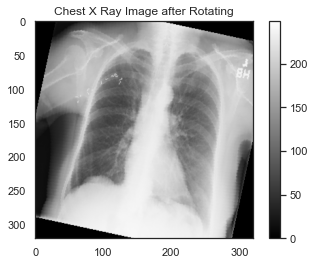

In [101]:
# Random rotation

data_transform = transforms.Compose([
    transforms.Resize((320, 320)),
    ### Your code here, use API like transforms.XXX() ###
    transforms.RandomRotation(20),
    ### End your code ###
    transforms.ToTensor()
])
dataset = XRayDataset('nih/images-small', data_transform)

sns.set_style("white")
generated_image = dataset.__getitem__(0)
inverted_image = transform_invert(copy.deepcopy(generated_image), data_transform)
plt.imshow(inverted_image, cmap='gray')
plt.colorbar()
plt.title('Chest X Ray Image after Rotating')

Text(0.5, 1.0, 'Chest X Ray Image after Color Jittering')

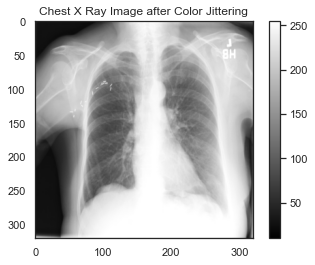

In [115]:
# Color jittering

data_transform = transforms.Compose([
    transforms.Resize((320, 320)),
    ### Your code here, use API like transforms.XXX() ###
    transforms.ColorJitter(brightness=0.1, contrast=0, saturation=1, hue=1),
    ### End your code ###
    transforms.ToTensor()
])
dataset = XRayDataset('nih/images-small', data_transform)

sns.set_style("white")
generated_image = dataset.__getitem__(0)
inverted_image = transform_invert(copy.deepcopy(generated_image), data_transform)
plt.imshow(inverted_image, cmap='gray')
plt.colorbar()
plt.title('Chest X Ray Image after Color Jittering')

Text(0.5, 1.0, 'Chest X Ray Image after Random Erasing')

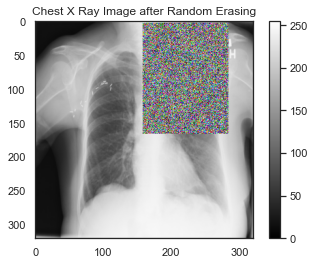

In [143]:
# Random Erasing

data_transform = transforms.Compose([
    transforms.Resize((320, 320)),
    transforms.ToTensor(),
    ### Your code here, use API like transforms.XXX() ###
    transforms.RandomErasing(p=0.9,scale=(0.2,0.2),value='random')
    ### End your code ###
])
dataset = XRayDataset('nih/images-small', data_transform)

sns.set_style("white")
generated_image = dataset.__getitem__(0)
inverted_image = transform_invert(copy.deepcopy(generated_image), data_transform)
plt.imshow(inverted_image, cmap='gray')
plt.colorbar()
plt.title('Chest X Ray Image after Random Erasing')

#### That's it for this exercise, you should now be a bit more familiar with the medical dataset!